In [18]:
# Description: An stock analyse program
# Autor : SICHENG ZHAO
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# Block 0 Data importing
import tushare as ts
token=""
pro = ts.pro_api(token)
# 1.上市股票列表
#stocklist = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

# 2.获取行情数据
#s1=pro.query('daily', ts_code='000001.SZ', start_date='20180701', end_date='20180718')

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
1,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
3,000001.SZ,20180713,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
4,000001.SZ,20180712,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828
5,000001.SZ,20180711,8.76,8.83,8.68,8.78,8.98,-0.20,-2.23,851296.70,744765.824
6,000001.SZ,20180710,9.02,9.02,8.89,8.98,9.03,-0.05,-0.55,896862.02,803038.965
7,000001.SZ,20180709,8.69,9.03,8.68,9.03,8.66,0.37,4.27,1409954.60,1255007.609
8,000001.SZ,20180706,8.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526
9,000001.SZ,20180705,8.62,8.73,8.55,8.60,8.61,-0.01,-0.12,835768.77,722169.579


,trade_date,close,Log_Return,Diff_Log_Return,Diff_Log_Return(in %)
12,2018-07-02,8.61,2.152924,NaN,NaN
11,2018-07-03,8.67,2.159869,0.06,6.0
10,2018-07-04,8.61,2.152924,-0.06,-6.0
9,2018-07-05,8.60,2.151762,-0.01,-1.0
8,2018-07-06,8.66,2.158715,0.06,6.0
7,2018-07-09,9.03,2.200552,0.37,37.0
6,2018-07-10,8.98,2.195000,-0.05,-5.0
5,2018-07-11,8.78,2.172476,-0.20,-20.0
4,2018-07-12,8.88,2.183802,0.10,10.0
3,2018-07-13,8.88,2.183802,0.00,0.0


,close,Log_Return,Diff_Log_Return,Diff_Log_Return(in %)
count,13.000000,13.000000,12.000000,12.000000
mean,8.757692,2.169810,0.007500,0.750000
std,0.142954,0.016241,0.142263,14.226256
min,8.600000,2.151762,-0.200000,-20.000000
25%,8.660000,2.158715,-0.052500,-5.250000
50%,8.720000,2.165619,-0.010000,-1.000000
75%,8.880000,2.183802,0.060000,6.000000
max,9.030000,2.200552,0.370000,37.000000


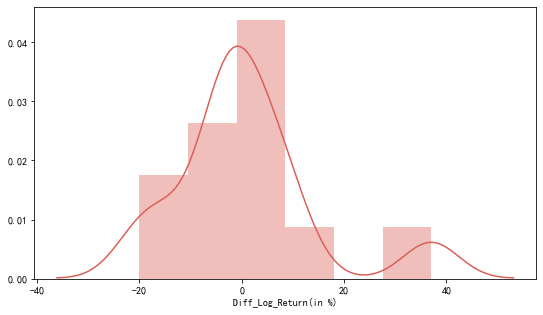

In [49]:
def ProcessData(df):
    df['trade_date'] = pd.to_datetime(df['trade_date'])
    df.sort_values("trade_date",inplace=True)
    data_df = df.loc[:,["trade_date","close"]]
    data_df.set_index("trade_date")
    data_df["Log_Return"]=data_df["close"].apply(np.log)
    data_df["Diff_Log_Return"]=data_df["close"].diff(1)
    data_df["Diff_Log_Return(in %)"]=data_df["Diff_Log_Return"].multiply(100)
    display(data_df)
    return(data_df)

s1_processed= ProcessData(s1)
# 0. Statistics of the data
display(s1_processed.describe())
# 1. Distribution Plot
sns.set_palette("hls")
mpl.rc("figure", figsize=(9, 5))
sns.distplot(s1_processed["Diff_Log_Return(in %)"])

TypeError: cannot convert the series to <class 'float'>